# Proyecto 1

##### Integrantes:

##### Mauricio López Coronado

##### Luis Alejandro Ledesma Mujica

##### Santiago Chavarria Minakata

## Minimizar el costo de instalación de una tubería de agua potable.


### Objetivo general: 
- Minimizar los costos de instalación de una tubería teniendo en cuenta las nóminas de los trabajadores, personas contratadas, costo del material y maquinaria.


### Objetivos específicos:
- Plantear la ecuación de gasto, sus variables y restricciones según el plano de la colonia planteado.
- 
Desarrollar un código de optimización para reducir costos de instalación.
- 
Decidir la cantidad de personas para contratar para que el tiempo, el pago de nóminas y el desperdicio sea el menor posible.


### Información del problema:

Para este proyecto, se está realizando una urbanización en una colonia donde no tienen acceso al agua potable, (Rotoplas, 2020) es importante tener en cuenta que el gasto de las instalaciones de tuberías representan del 10-20% en instalaciones pequeñas y a gran escala pueden representar hasta el 40% del gasto total por lo que es importante usar la menor cantidad de tubo posible, el menor tiempo posible de la excavadora, y minimizar los costos de instalación para poder minimizar el costo de la instalación de este para poder maximizar las ganancias del proyecto.


### Consideraciones:

- Se usará el tubo de PVC, capaz de soportar una presión de 25 kg/cm2, de 100 mm de diámetro, con un longitud estándar de 5.95m.

- Se tienen 3 proveedores y son los siguientes:

- Termo plus - 8,400 pesos cada tubo, para aceptar la orden se deben pedir entre 60 y 70 tubos, esta es la cantidad válida para transportar por carretera los tubos, al exceder esta cantidad, debido a que el almacen se encuentra en Puebla, ya no es rentable debido al alto incremento de costos de transporte.

- DepotMX - 10,396 pesos cada tubo, puede suministrar la cantidad que sea, tiene una promoción que se aplica si se compran mínimo 50 tubos pero máximo 75, el precio queda 3215 pesos.

- ITSA - 10,234 pesos cada tubo y este es capaz de suministrar los tubos que sean necesarios.

- Longitud total a usar 675.9 m.  

- Del sistema de precios unitarios en México, se obtiene lo siguiente: 

- Para un maestro, el precio de mano de obra es de 110 pesos por hora.

- Para un ayudante, el precio de mano de obra es de 50 pesos por hora.
  
- A la semana el mínimo de horas es de 40, el máximo de 48.

- Se cuenta con 2 ayudantes y un maestro.

- Se debe rentar una retroexcavadora, en base a un presupuesto obtenido a la constructora AB e Industrias LOSAL, la renta de una retroexcavadora CASE,  se encuentra a 500 por hora.

### Resumen:

Proveedor 1 - $ 8400 y mínimo 60, máximo 70 tubos.

Proveedor 2 - $ 3215 y minimo 50 tubos, máximo 75.

Proveedor 3 - $ 10,234, mayor a 0

Longitud total - 675.9 m

Maestro - 110 pesos por hora.

Ayudante - 50 pesos por hora.

2 ayudantes y un maestro.

Retroexcavadora 500 por hora.

A la semana mínimo 40 horas, máximo 48 cada uno.

### Modelo:


El problema planteado es una optimización y con esta se busca minimizar el costo total de la instalación de la tubería, incluyendo nóminas, costos de instalación y materiales.

### Variables de control:

$ m $ -- Maestro

$ a $-- Ayudante

$ t_1 $ -- tubo de proveedor 1

$ t_2$ -- tubo de proveedor 2

$ t_2$ -- tubo de proveedor 3

$ r $ -- retroexcavadora



### Función de costo

$ f(m, a, t_1, t_2, t_3, r) = 110 m +  50 a + 8400 t_1 + 3215 t_2 + 10234 t_3 + 500 r $


costo total = costo de materiales + costo de nómina + costo de renta de equipo o maquinaria 

### Restricciones


$$ \min_{m, a, t_1, t_2, t_3, r} = 15 m + 10 a + 8400 t_1 + 3215 t_2 + 10234 t_3 + 500 r $$
$$ s.t $$

$$ t_1 \geq 40 $$
$$ t_1 \leq 70 $$
$$  t_2 \geq 50 $$
$$  t_2 \leq 75 $$
$$ t_3 \geq 0 $$
$$ m    \geq 40 $$
$$ m    \leq 48 $$
$$ a   \geq 40 $$
$$ a   \leq 48 $$
$$ r   \geq 40 $$
$$ r   \leq 48 $$
$$ 5.95 t_1 + 5.95 t_2 + 5.95 t_3 = 675.9 $$


In [714]:
import numpy as np
from scipy.optimize import linprog

p1= 8400 #costo tubo 1
p2= 3215 #costo tubo 2
p3= 10234 #costo tubo 3
m= 110 #costo maestro por hr
a= 50 #costo ayudante por hr
r= 500 #costo retro por hr

#Funcion costo
c = np.array([p1, p2, p3, m, 2*a, r ])
              
#restricciones desigualdad
A_ub = [
    [  -1,   0,    0,   0,   0,    0], 
    [   1,   0,    0,   0,   0,    0],  
    [   0,  -1,    0,   0,   0,    0], 
    [   0,   1,    0,   0,   0,    0],  
    [   0,   0,   -1,   0,   0,    0],   
    [   0,   0,    0,  -1,   0,    0], 
    [   0,   0,    0,   1,   0,    0],  
    [   0,   0,    0,   0,  -1,    0], 
    [   0,   0,    0,   0,   1,    0],  
    [   0,   0,    0,   0,   0,   -1],
    [   0,   0,    0,   0,   0,    1]   
]

b_ub = [-60, 70, -50, 75, -1, -40, 48, -40, 48, -40, 48]



# Restricciones de igualdad 
A_eq = [[5.95, 
         5.95,
         5.95, 
         0, 
         0, 
         0]] 
tmax = [675.9]

# Resolución 
res = linprog (c, A_ub = A_ub, b_ub = b_ub, A_eq = A_eq, b_eq = b_eq, method='highs')

# Mostrar resultados
if res.success:
    print(f"La solución de la optimización es: \n{res}")

La solución de la optimización es: 
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 711732.1932773109
              x: [ 6.000e+01  5.260e+01  1.000e+00  4.000e+01  4.000e+01
                   4.000e+01]
            nit: 0
          lower:  residual: [ 6.000e+01  5.260e+01  1.000e+00  4.000e+01
                              4.000e+01  4.000e+01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 5.403e+02]
        ineqlin:  residual: [ 0.000e+00  1.000e+01  2.597e+00  2.240e+01
                              

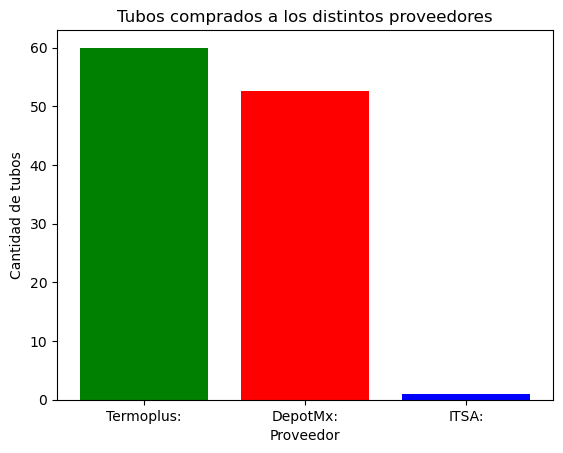

In [716]:
import matplotlib.pyplot as plt

#Mostrar los tubos comprados
proveedores = ["Termoplus:", "DepotMx:", "ITSA:" ]

tubos = res.x[:3]

plt.figure()
plt.bar(proveedores, tubos, color=["g", "r", "b"])
plt.title("Tubos comprados a los distintos proveedores")
plt.xlabel("Proveedor")
plt.ylabel("Cantidad de tubos")
plt.show()


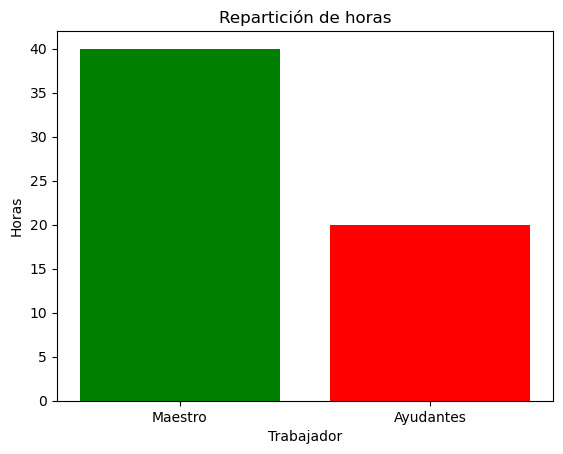

In [718]:
import matplotlib.pyplot as plt

#Mostrar las horas que trabajaron
trabajadores = ["Maestro:", "Ayudante:" ]

hm = res.x[3]
ha = res.x[4]/2  #Se divide entre 2 ya que son 2 ayudantes y para sacar las horas de cada uno

plt.figure()
plt.bar(["Maestro","Ayudantes"], [hm, ha], color=["g", "r"])
plt.title("Repartición de horas")
plt.xlabel("Trabajador")
plt.ylabel("Horas")
plt.show()

### Bibliografía

Medina F, (2024), Fraccionamiento en AutoCAD (729.14 KB) | Bibliocad https://www.bibliocad.com/es/biblioteca/fraccionamiento_49634/#google_vignette

PUC (2023, 20 septiembre). Precio unitario de colocación de 【 Tubería de PVC 】. Precios Unitarios de Construcción. https://preciosunitariosconstruccion.com/obra-civil/tuberia-pvc/#:~:text=El%20precio%20unitario%20de%20instalaci%C3%B3n%20de%20tuber%C3%ADa%20de%20PVC%20por

Rotoplas. (2020). Guía completa sobre los diámetros de tubería hidráulica: ¿Cómo elegir el tamaño adecuado para tu proyecto? Rotoplas.com.mx. Recuperado 25 de septiembre de 2024, de https://rotoplas.com.mx/guia-completa-sobre-los-diametros-de-tuberia-hidraulica-como-elegir-el-tamano-adecuado-para-tu-proyecto/#:~:text=Tuboplus%20ofrece%20amplitud%20de%20opciones.%20Por%20ejemplo,%20Tuboplus%20Fortech-CT%20cuenta

Termoplus (2024).  Tubo PVC orientado Clase 500 Agua potable | Cotizador online. https://termoplus.mx/cotizador/agua-potable/tubo-pvc-orientado-clase-500#:~:text=Tubo%20de%20PVC%20Orientado%20Clase%20500%20para%20presiones%2012.5,%2016,

TUBO PVC HIDRÁULICO CLASE 10(145PSI) 315MM(12) 6MT. (2024). ITSAMEXICO. https://www.itsamexico.com/shop/tuh-c10-315-tubo-pvc-hidraulico-clase-10-145psi-315mm-12-6mt-11860#attr=

TUBO PVC CAMP/ANILLO RD 32.5 200MM de 8″(tramo 6 mts). (2022). DepotMX. https://depotmx.com/producto/tubo-pvc-camp-anillo-rd-32-5-200mm/

